<font size="+3"><strong>Exploring the Data</strong></font>

Dans ce projet, nous allons travailler avec des données de [Survey of Consumer Finances](https://www.federalreserve.gov/econres/scfindex.htm) (SCF). SCF est une enquête parrainée par la Réserve fédérale des États-Unis. Elle suit les informations financières, démographiques et d'opinion sur les familles aux États-Unis. L'enquête est menée tous les trois ans, et nous travaillerons avec un extrait des résultats de 2019.

# Prepare Data 

## Import

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("SCFP2019.csv")
print("df shape:", df.shape)
df.head()

df shape: (28885, 351)


YY1  Y1          WGT  HHSEX  AGE  AGECL  EDUC  EDCL  MARRIED  KIDS  ...  \
0    1  11  6119.779308      2   75      6    12     4        2     0  ...   
1    1  12  4712.374912      2   75      6    12     4        2     0  ...   
2    1  13  5145.224455      2   75      6    12     4        2     0  ...   
3    1  14  5297.663412      2   75      6    12     4        2     0  ...   
4    1  15  4761.812371      2   75      6    12     4        2     0  ...   

   NWCAT  INCCAT  ASSETCAT  NINCCAT  NINC2CAT  NWPCTLECAT  INCPCTLECAT  \
0      5       3         6        3         2          10            6   
1      5       3         6        3         1          10            5   
2      5       3         6        3         1          10            5   
3      5       2         6        2         1          10            4   
4      5       3         6        3         1          10            5   

   NINCPCTLECAT  INCQRTCAT  NINCQRTCAT  
0             6          3           3  
1             5          2           2  
2             5          2           2  
3             4          2           2  
4             5          2           2  

[5 rows x 351 columns]

Une des premières choses que vous pourriez remarquer ici est que cet ensemble de données est ÉNORME - plus de 20 000 lignes et 351 colonnes ! TANT DE DONNÉES !!! Nous n'aurons pas le temps d'explorer toutes les fonctionnalités de cet ensemble de données, mais vous pouvez consulter le dictionnaire de données pour ce projet pour plus de détails et des liens vers le [Code Book](https://sda.berkeley.edu/sdaweb/docs/scfcomb2019/DOC/hcbk.htm). Pour l'instant, disons simplement que cet ensemble de données suit toutes sortes de comportements liés aux moyens par lesquels les ménages gagnent, économisent et dépensent de l'argent aux États-Unis.

Pour ce projet, nous allons nous concentrer sur les ménages qui ont "été refusés de crédit ou qui ont craint d'être refusés de crédit au cours des 5 dernières années". Ces ménages sont identifiés dans la colonne "TURNFEAR".

In [4]:
mask = df["TURNFEAR"] == 1
df_fear = df[mask]
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear shape: (4623, 351)


YY1  Y1          WGT  HHSEX  AGE  AGECL  EDUC  EDCL  MARRIED  KIDS  ...  \
5    2  21  3790.476607      1   50      3     8     2        1     3  ...   
6    2  22  3798.868505      1   50      3     8     2        1     3  ...   
7    2  23  3799.468393      1   50      3     8     2        1     3  ...   
8    2  24  3788.076005      1   50      3     8     2        1     3  ...   
9    2  25  3793.066589      1   50      3     8     2        1     3  ...   

   NWCAT  INCCAT  ASSETCAT  NINCCAT  NINC2CAT  NWPCTLECAT  INCPCTLECAT  \
5      1       2         1        2         1           1            4   
6      1       2         1        2         1           1            4   
7      1       2         1        2         1           1            4   
8      1       2         1        2         1           1            4   
9      1       2         1        2         1           1            4   

   NINCPCTLECAT  INCQRTCAT  NINCQRTCAT  
5             4          2           2  
6             3          2           2  
7             4          2           2  
8             4          2           2  
9             4          2           2  

[5 rows x 351 columns]

## Explore

### Age

In [5]:
age_groups = df_fear["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [3 5 1 2 4 6]


In [6]:
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = pd.Series(df_fear["AGECL"].replace(agecl_dict))
age_cl.head()

5    45-54
6    45-54
7    45-54
8    45-54
9    45-54
Name: AGECL, dtype: object

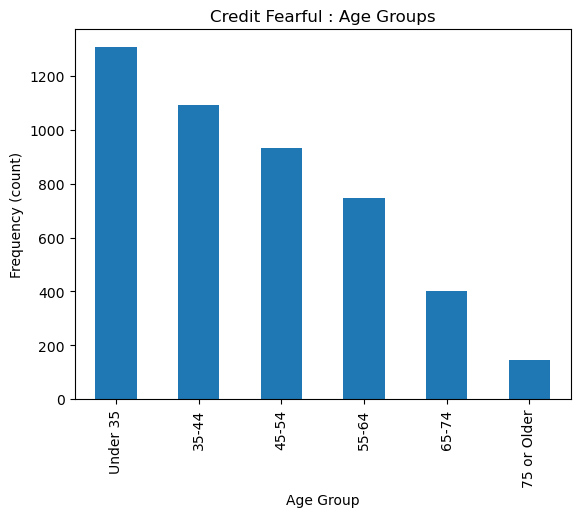

In [7]:
age_cl_value_counts = age_cl.value_counts()

# Bar plot of `age_cl_value_counts`
age_cl_value_counts.plot(kind="bar")
plt.xlabel("Age Group")
plt.ylabel("Frequency (count)")
plt.title("Credit Fearful : Age Groups");

Vous avez peut-être remarqué que, en créant leurs propres groupes d'âge, les auteurs de l'enquête nous ont essentiellement fourni un histogramme composé de 6 bins. Notre graphique nous indique que de nombreuses personnes qui craignent d'être refusées de crédit sont plus jeunes. Mais les deux premiers groupes d'âge couvrent une plage plus large que les quatre autres. Il peut donc être utile de regarder à l'intérieur de ces valeurs pour avoir une compréhension plus granulaire des données.

Pour cela, nous devrons regarder une autre variable : "AGE". Alors que "AGECL" était une variable catégorique, "AGE" est continue, nous pouvons donc l'utiliser pour créer un histogramme de notre propre.

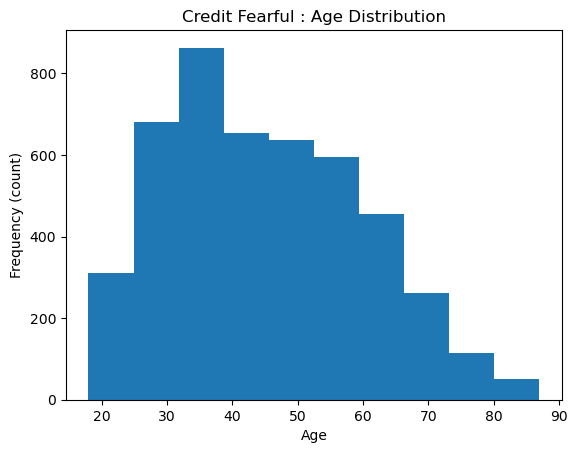

In [8]:
# Plot histogram of "AGE"
plt.hist(df_fear["AGE"], bins = 10)
plt.xlabel("Age")
plt.ylabel("Frequency (count)")
plt.title("Credit Fearful : Age Distribution");

Il semble que les jeunes soient encore plus préoccupés par la possibilité de obtenir un prêt que les personnes âgées, mais les personnes les plus préoccupées semblent être âgées entre 30 et 40 ans.

### Race

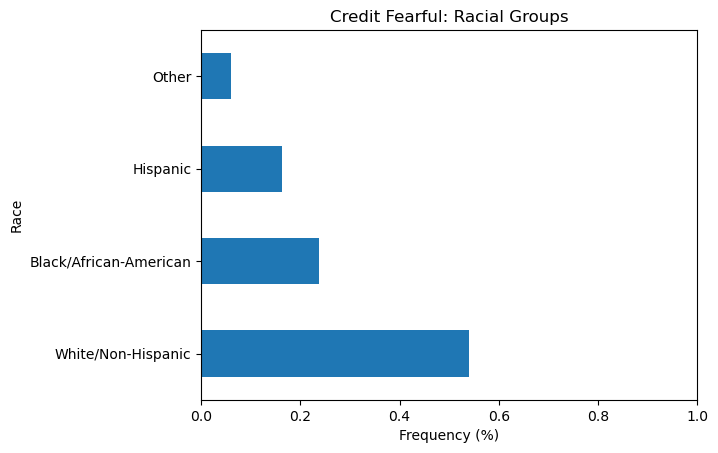

In [9]:
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race = pd.Series(df_fear["RACE"].replace(race_dict))
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

Cela suggère que les personnes blanches/non hispaniques sont plus préoccupées par le fait d'être refusées de crédit, mais en réfléchissant critiquement à ce que nous voyons, cela pourrait être parce qu'il y a plus de personnes blanches/non hispaniques dans la population des États-Unis que d'autres groupes raciaux, et l'échantillon de cette enquête a été spécifiquement tiré pour être représentatif de la population dans son ensemble.

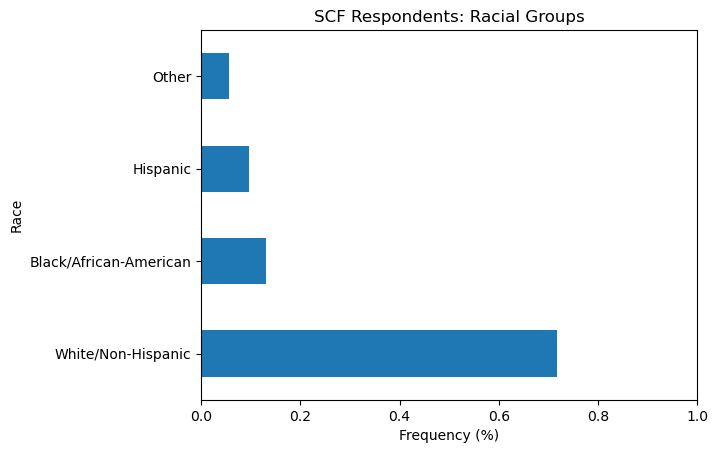

In [10]:
race = pd.Series(df["RACE"].replace(race_dict))
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

Comment ce deuxième diagramme à barres modifie-t-il notre perception du premier ? D'une part, nous pouvons voir que les personnes blanches non hispaniques représentent environ 70% de l'ensemble des données, mais seulement 54% des répondants craintifs en matière de crédit. D'autre part, les répondants noirs et hispaniques représentent 23% de l'ensemble des données mais 40% des répondants craintifs en matière de crédit. En d'autres termes, les ménages noirs et hispaniques sont en fait plus susceptibles d'être dans le groupe craintif en matière de crédit.

### Income

Et pour le niveau de revenu ? Les personnes aux revenus plus bas sont-elles préoccupées par le fait d'être refusées de crédit, ou est-ce quelque chose qui préoccupe les personnes aux revenus plus élevés ? Pour répondre à cette question, nous devrons à nouveau comparer l'ensemble des données avec notre sous-groupe en utilisant la caractéristique "INCCAT", qui capture les groupes de centiles de revenu. Cette fois, cependant, nous allons créer un diagramme à barres côte à côte.



In [11]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = (
    df["INCCAT"]
    .replace(inccat_dict)
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)


df_inccat

TURNFEAR   INCCAT  frequency
0          0   90-100   0.297296
1          0  60-79.9   0.174841
2          0  40-59.9   0.143146
3          0     0-20   0.140343
4          0  21-39.9   0.135933
5          0  80-89.9   0.108441
6          1     0-20   0.288125
7          1  21-39.9   0.256327
8          1  40-59.9   0.228856
9          1  60-79.9   0.132598
10         1   90-100   0.048886
11         1  80-89.9   0.045209

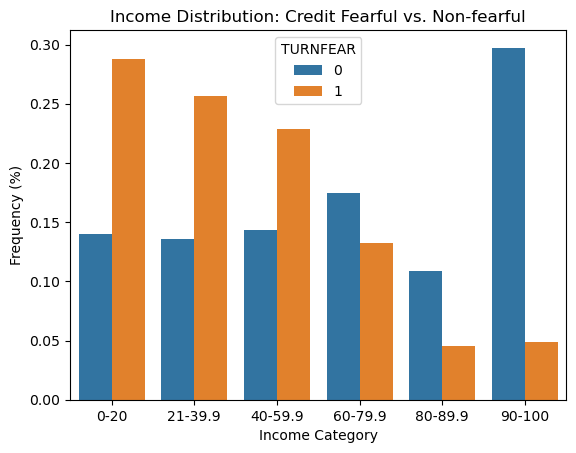

In [12]:
# Create bar chart of `df_inccat`
sns.barplot(
    x="INCCAT",
    y="frequency",
    hue = "TURNFEAR",
    data=df_inccat,
    order = inccat_dict.values()
)
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

En comparant les catégories de revenus entre les groupes craintifs et non craintifs, nous pouvons voir que les ménages craintifs en matière de crédit sont beaucoup plus courants dans les catégories de revenus les plus faibles. En d'autres termes, les craintifs en matière de crédit ont des revenus plus faibles.

Donc, sur la base de tout cela, que savons-nous ? Parmi les personnes qui ont répondu qu'elles étaient effectivement inquiètes d'être approuvées pour un crédit après avoir été refusées au cours des cinq dernières années, une pluralité de jeunes et de personnes aux faibles revenus ont eu le plus grand nombre de répondants. Cela a du sens, non ? Les jeunes ont tendance à gagner moins d'argent et à dépendre davantage du crédit pour lancer leur vie, donc avoir été refusé de crédit les rend plus anxieux pour l'avenir.

### Assets

In [13]:
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5198273544779252


C'est une corrélation modérément positive, que nous pourrions probablement attendre, non ? Pour de nombreux Américains, la valeur de leur résidence principale représente la plupart de la valeur de leurs actifs totaux. Et pour les personnes de notre sous-ensemble TURNFEAR ? Voyons si cette corrélation présente une différence.

In [14]:
asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.5832879735979152


Aha ! Elles sont différentes ! C'est toujours une corrélation modérément positive, mais la relation entre la valeur totale des actifs et la valeur de la résidence principale est plus forte pour notre groupe TURNFEAR que pour la population dans son ensemble.

Faisons des matrices de corrélation en utilisant le reste des données pour df et df_fear et voyons si les différences persistent. Ici, nous ne regarderons que 5 caractéristiques : "ASSET", "HOUSES", "INCOME", "DEBT" et "EDUC".

In [15]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis=None)

In [16]:
corr = df_fear[cols].corr()
corr.style.background_gradient(axis=None)

Whoa ! Il y a ici de assez importantes différences ! La relation entre "DEBT" et "HOUSES" est positive pour les deux jeux de données, mais alors que le coefficient pour df est assez faible à 0,26, le même nombre pour df_fear est de 0,96.

Rappelez-vous, plus le coefficient de corrélation est proche de 1,0, plus ils correspondent exactement. Dans ce cas, cela signifie que la valeur de la résidence principale et la dette totale détenue par le ménage sont très proches de la même valeur. Cela suggère que la principale source de dette supportée par notre groupe "TURNFEAR" est leur résidence principale, ce qui, encore une fois, est une trouvaille intuitive.

"DEBT" et "ASSET" partagent une différence de manière similaire, tout comme "EDUC" et "DEBT", qui, bien que moins contrastée que les autres, est encore assez importante pour retenir l'attention de notre banquier hypothétique.

Faisons des visualisations pour montrer graphiquement ces relations.

### Education

In [17]:
df_educ = (
    df["EDUC"]
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("frequency")
    .to_frame()
    .reset_index()
)
df_educ.head()

TURNFEAR  EDUC  frequency
0         0    12   0.257481
1         0     8   0.192029
2         0    13   0.149823
3         0     9   0.129833
4         0    14   0.096117

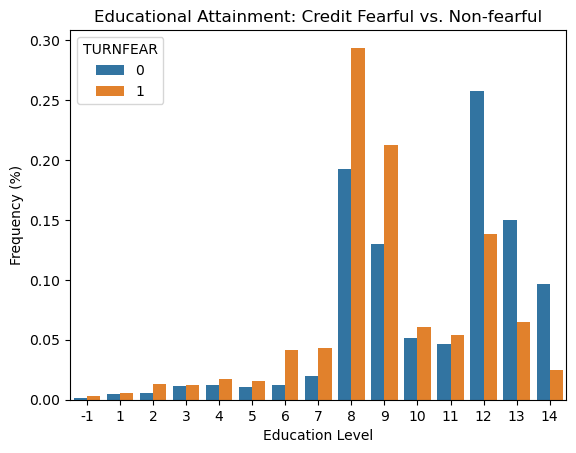

In [18]:
# Create bar chart of `df_educ`
sns.barplot(
    x="EDUC",
    y="frequency",
    hue = "TURNFEAR",
    data=df_educ
)
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

Dans ce graphique, nous pouvons voir qu'une proportion beaucoup plus élevée de répondants craintifs en matière de crédit n'ont qu'un diplôme d'études secondaires, tandis que les diplômes universitaires sont plus courants parmi les non craintifs en matière de crédit.






### Debt

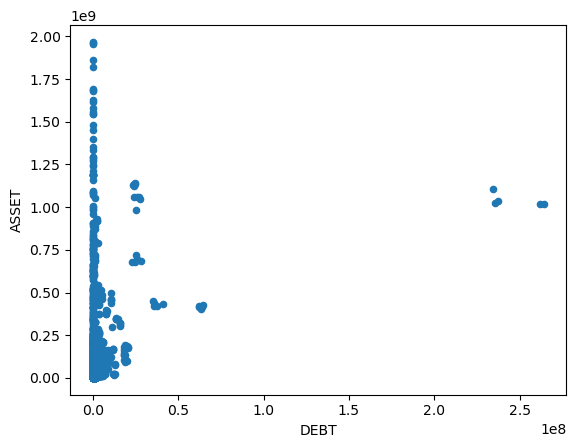

In [19]:
# Create scatter plot of ASSET vs DEBT, df
df.plot(kind="scatter", x="DEBT", y="ASSET");

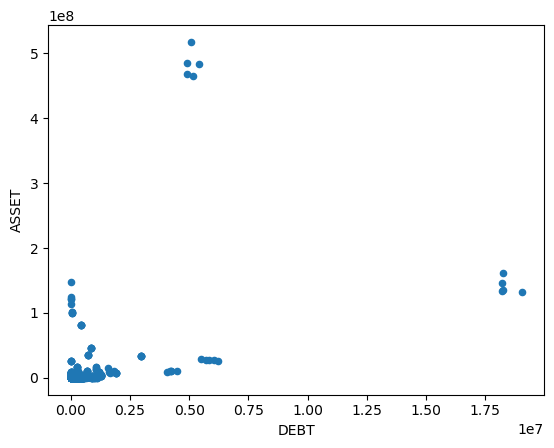

In [20]:
# Create scatter plot of ASSET vs DEBT, df_fear
df_fear.plot(kind="scatter", x="DEBT", y="ASSET");

Vous pouvez voir que la relation dans notre graphique df_fear est plus plate que dans notre graphique df, mais elles sont clairement différentes.

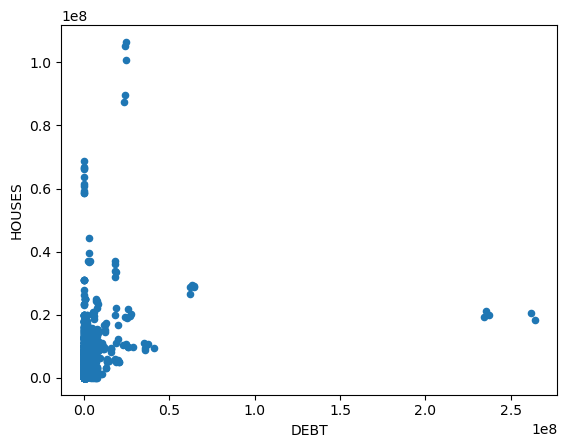

In [21]:
# Create scatter plot of HOUSES vs DEBT, df
df.plot(kind="scatter", x="DEBT", y="HOUSES");

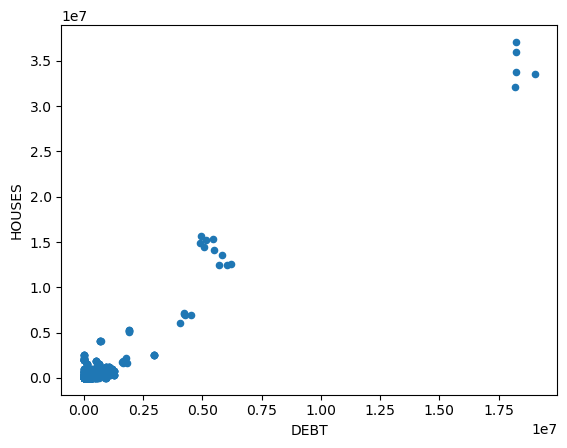

In [22]:
# Create scatter plot of HOUSES vs DEBT, df_fear
df_fear.plot(kind="scatter", x="DEBT", y="HOUSES");

Les valeurs aberrantes rendent un peu difficile de voir la différence entre ces deux graphiques, mais la relation est assez claire : notre graphique df_fear montre une relation linéaire presque parfaite, tandis que notre graphique df montre quelque chose de un peu plus embrouillé. Vous pouvez également remarquer que les points de données sur le graphique df_fear forment plusieurs petits groupes. Ceux-ci sont appelés "groupes".